# Business Understanding

## Project Domain

Automotive Industry & Ford Car Market & Price Prediction Systems

Sistem prediksi harga mobil Ford (Ford Car Price Prediction System) merupakan bagian dari solusi digital untuk industri otomotif, khususnya di pasar mobil Ford yang sangat dinamis. Dengan memanfaatkan machine learning dan artificial neural network (ANN), sistem ini bertujuan membantu konsumen, penjual, dan perusahaan otomotif dalam memperkirakan harga pasar yang adil dan akurat untuk sebuah mobil berdasarkan fitur-fitur tertentu.

## Problem Statements

- Ketidaksesuaian Harga Pasar
Banyak penjual dan pembeli mobil bekas yang menetapkan harga secara subjektif tanpa dasar data historis yang akurat, sehingga menimbulkan harga yang tidak wajar.

- Kurangnya Transparansi dalam Penilaian
Tanpa sistem otomatis, proses menentukan harga mobil sangat bergantung pada opini subjektif tenaga penilai atau dealer.

- Kendala dalam Negosiasi
Ketidakjelasan harga wajar menyulitkan proses tawar-menawar antara penjual dan pembeli, yang dapat menghambat keputusan pembelian.

- Tidak Efisiennya Proses Penjualan
Waktu yang dihabiskan untuk menetapkan harga dan melakukan penyesuaian harga secara manual menghambat efisiensi operasional.

## Goals

Membangun sistem berbasis AI (Artificial Neural Network) yang mampu memprediksi harga pasar mobil bekas berdasarkan parameter-parameter teknis dan spesifikasi mobil:
- Tahun produksi
- Model mobil
- Tipe bahan bakar
- Tipe transmisi
- Ukuran mesin (engine size)
- Konsumsi bahan bakar (MPG)
- Jarak tempuh (mileage)

## Solution Statements

- Machine Learning Model
Membangun model prediksi harga menggunakan Artificial Neural Network (ANN) berbasis TensorFlow, dilatih dari dataset riil mobil Ford. Target prediksi adalah nilai estimasi harga mobil secara regresi, bukan klasifikasi.

- Preprocessing dan Encoding
Data kategorikal seperti model, transmission, dan fuelType diencoding menggunakan LabelEncoder, dan data numerik dinormalisasi menggunakan StandardScaler untuk meningkatkan performa model.

- Aplikasi Web (Streamlit)
Membuat aplikasi interaktif menggunakan Streamlit, memungkinkan pengguna memasukkan spesifikasi mobil bekas dan mendapatkan estimasi harga secara instan.

- Optimasi dengan TensorFlow Lite
Model dikonversi ke .tflite agar ringan, efisien, dan siap di-deploy di berbagai perangkat melalui integrasi dengan web-hosting atau edge deployment.

# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

In [ ]:
!kaggle datasets download -d adhurimquku/ford-car-price-prediction

In [ ]:
!mkdir ford-car-price-prediction
!unzip ford-car-price-prediction.zip -d ford-car-price-prediction
!ls ford-car-price-prediction

## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/ford-car-price-prediction/ford.csv')
df.head()

In [ ]:
df.info()

# Exploratory Data Analisis

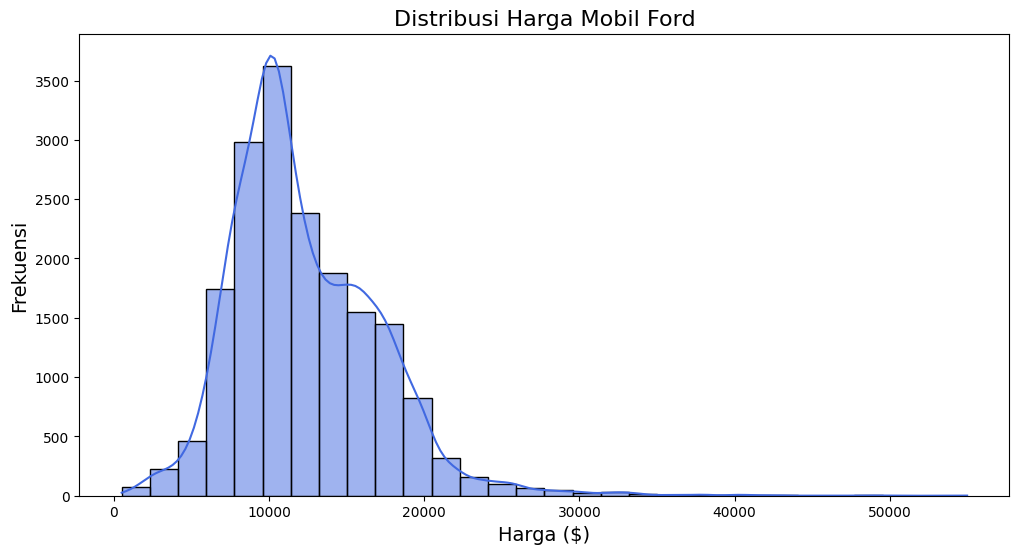

In [ ]:
# Distribusi Harga Mobil Ford
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True, color='royalblue')
plt.title('Distribusi Harga Mobil Ford', fontsize=16)
plt.xlabel('Harga ($)', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.show()

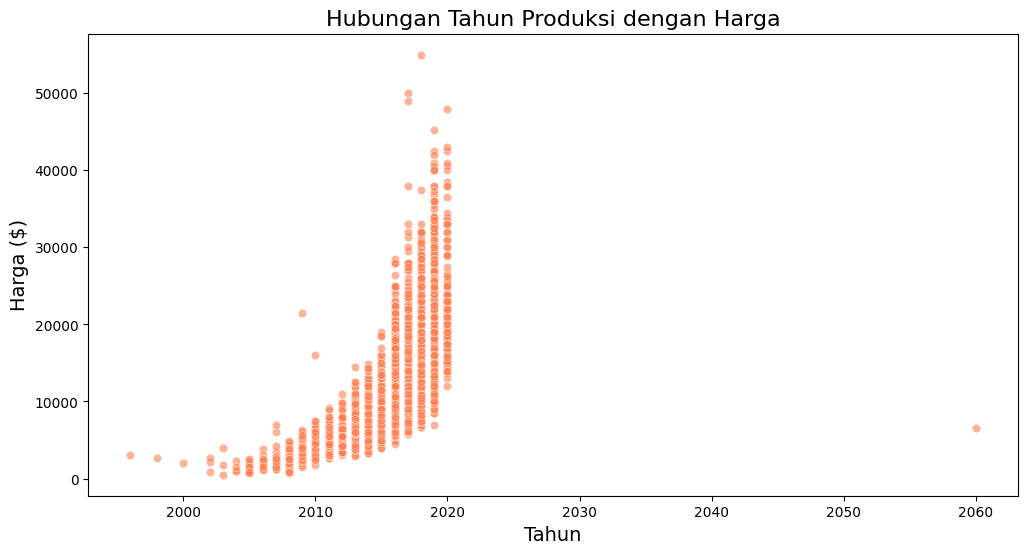

In [ ]:
# Hubungan antara Tahun dengan Harga
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='price', data=df, alpha=0.6, color='coral')
plt.title('Hubungan Tahun Produksi dengan Harga', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Harga ($)', fontsize=14)
plt.show()

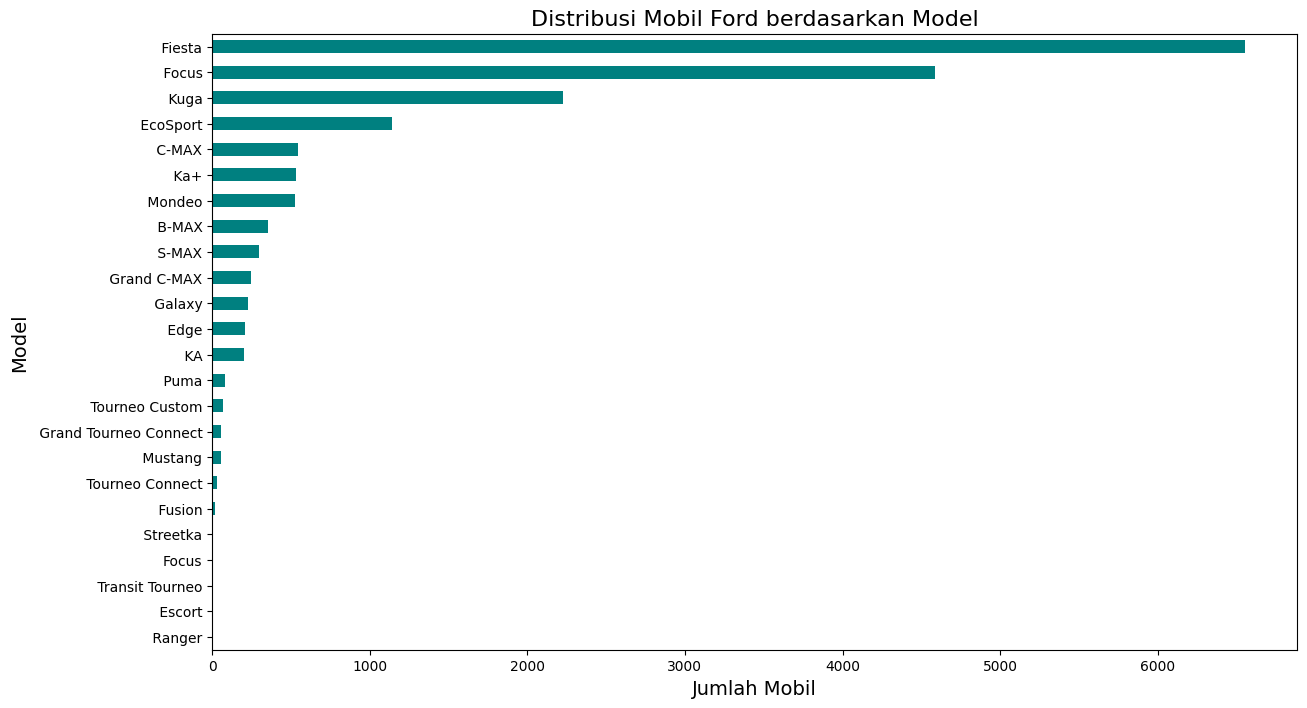

In [ ]:
# Distribusi Mobil berdasarkan Model
plt.figure(figsize=(14, 8))
model_counts = df['model'].value_counts().sort_values(ascending=True)
model_counts.plot(kind='barh', color='teal')
plt.title('Distribusi Mobil Ford berdasarkan Model', fontsize=16)
plt.xlabel('Jumlah Mobil', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

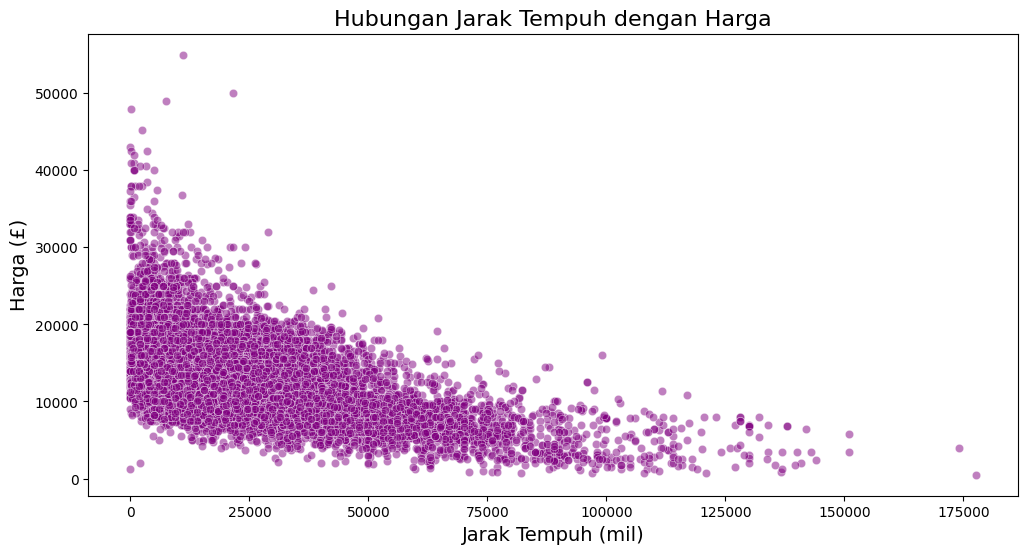

In [ ]:
# Pengaruh Jarak Tempuh (Mileage) terhadap Harga
plt.figure(figsize=(12, 6))
sns.scatterplot(x='mileage', y='price', data=df, alpha=0.5, color='purple')
plt.title('Hubungan Jarak Tempuh dengan Harga', fontsize=16)
plt.xlabel('Jarak Tempuh (mil)', fontsize=14)
plt.ylabel('Harga (£)', fontsize=14)
plt.show()

<ipython-input-101-b476066a66f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='price', data=df, order=transmission_order, palette='Set2')


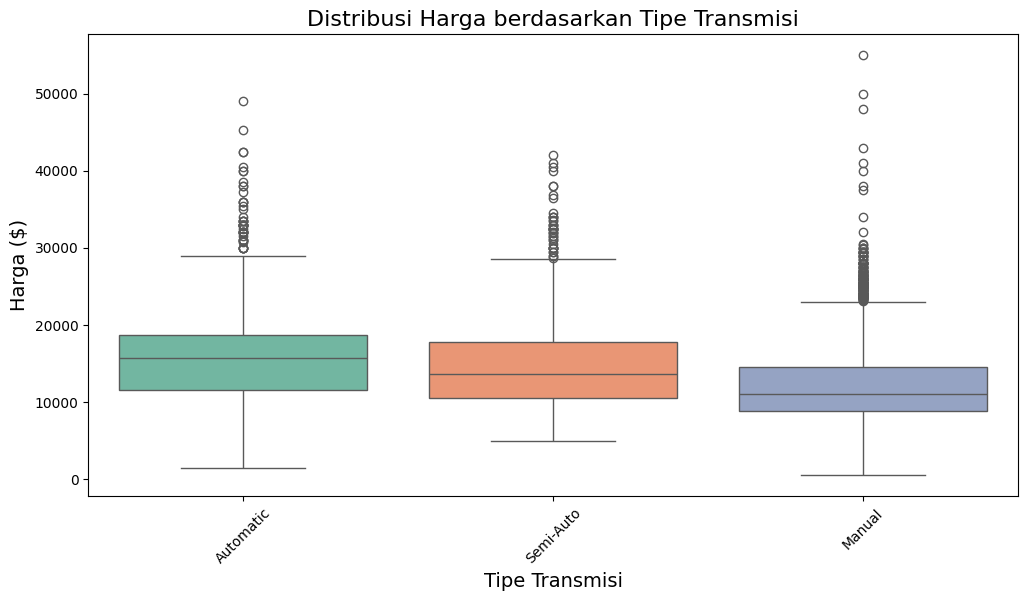

In [ ]:
# Harga Rata-rata per Tipe Transmisi
plt.figure(figsize=(12, 6))
transmission_order = df.groupby('transmission')['price'].mean().sort_values(ascending=False).index
sns.boxplot(x='transmission', y='price', data=df, order=transmission_order, palette='Set2')
plt.title('Distribusi Harga berdasarkan Tipe Transmisi', fontsize=16)
plt.xlabel('Tipe Transmisi', fontsize=14)
plt.ylabel('Harga ($)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Data Preparation

In [ ]:
# Fitur dan Target
X = df.drop(['price'], axis=1)
y = df["price"]


In [ ]:
categorical_columns = ['model', 'transmission', 'fuelType']

le_dict = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

In [ ]:
# Normalisasi Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # output 1 nilai prediksi harga
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

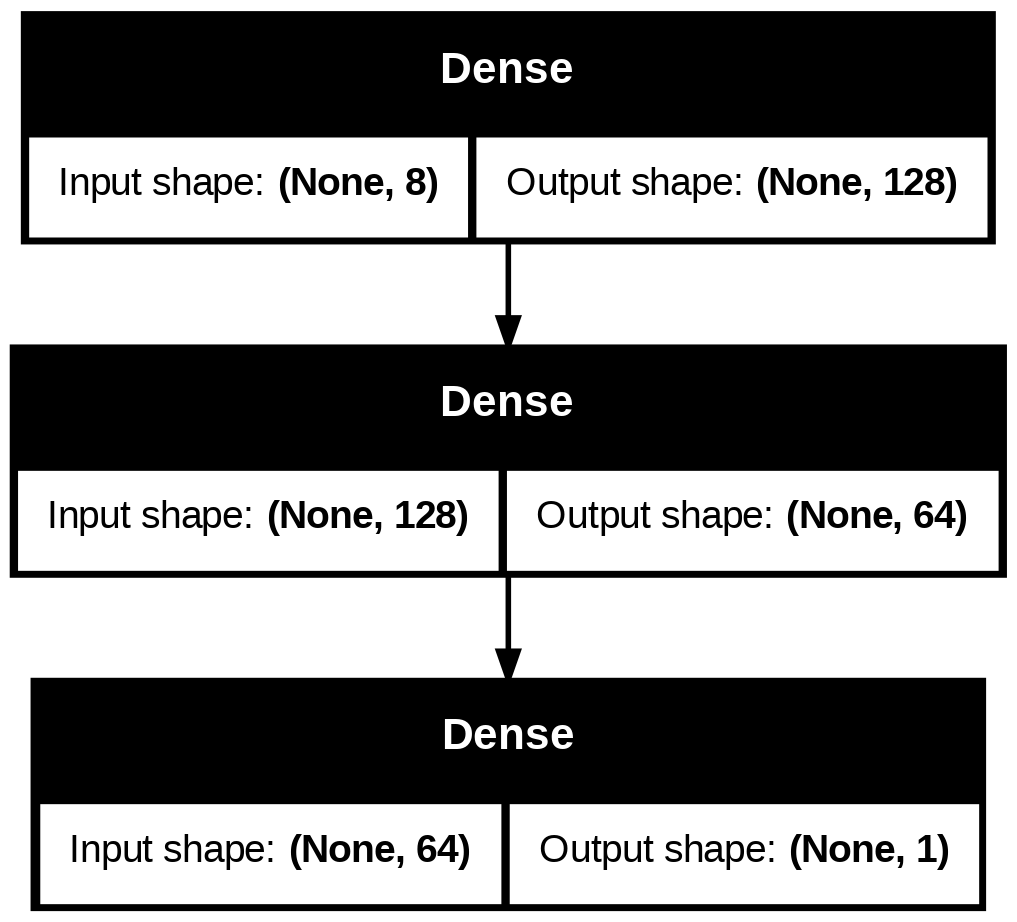

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 168247920.0000 - mae: 12082.6592 - val_loss: 102183128.0000 - val_mae: 9475.7041
Epoch 2/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 66844896.0000 - mae: 7318.5093 - val_loss: 10345569.0000 - val_mae: 2565.5439
Epoch 3/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9983934.0000 - mae: 2284.5200 - val_loss: 6293362.0000 - val_mae: 1886.5061
Epoch 4/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6396678.5000 - mae: 1825.8044 - val_loss: 5593989.0000 - val_mae: 1769.1614
Epoch 5/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6129164.0000 - mae: 1721.9907 - val_loss: 5149579.0000 - val_mae: 1681.2052
Epoch 6/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5282597.5000 - mae: 1623.7266 - val_loss: 4816690.0000 - val_mae: 1614.4730
Epoch 7/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5475064.0000 - mae: 1603.7594 - val_loss: 4577645.0000 - val_mae: 1566.0609
Epoch 8/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 2

# Evaluation

In [ ]:
# Mengevaluasi model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3755853.7500 - mae: 1355.5574
Test MAE: 1341.198974609375


In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 1341.1986083984375
RMSE: 1894.5265899427222
R² Score: 0.8398526310920715


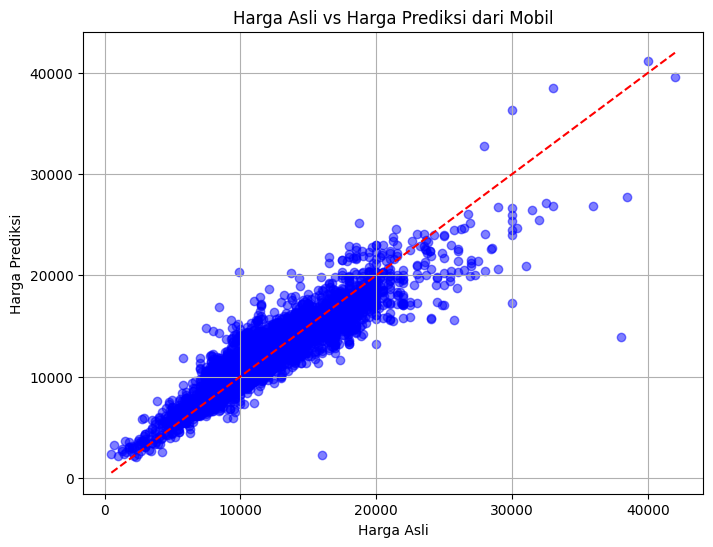

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Harga Asli")
plt.ylabel("Harga Prediksi")
plt.title("Harga Asli vs Harga Prediksi dari Mobil")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Training & Validation Loss')

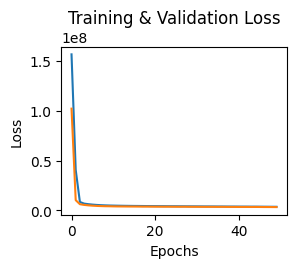

In [ ]:
plt.subplot(2, 2, 1)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')

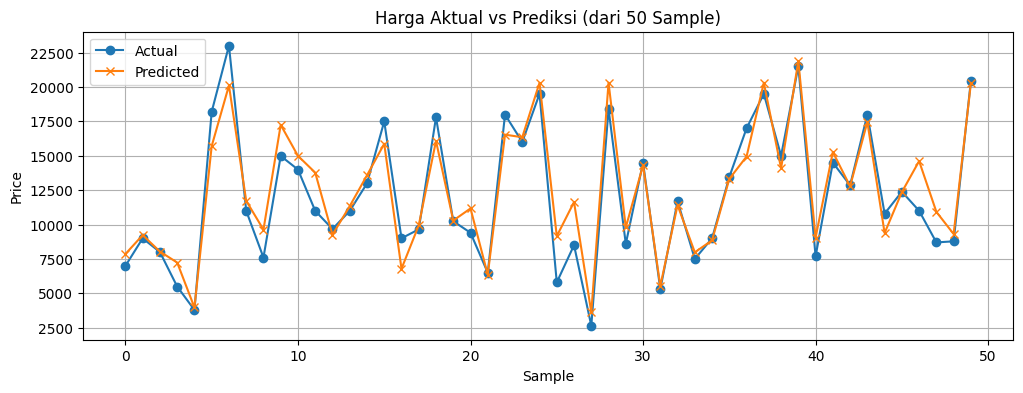

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(y_pred[:50], label="Predicted", marker='x')
plt.title("Harga Aktual vs Prediksi (dari 50 Sample)")
plt.xlabel("Sample")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Deployment

## Model Simulation

In [ ]:
# Simulasi data baru
sample = {
    'year': 2017,
    'mileage': 40000,
    'tax': 150,
    'mpg': 55.4,
    'engineSize': 1.6,
    'model': 'Focus',
    'transmission': 'Manual',
    'fuelType': 'Petrol'
}

# Encode kolom kategorikal
sample_encoded = [
    sample['year'],
    sample['mileage'],
    sample['tax'],
    sample['mpg'],
    sample['engineSize'],
    le_dict['model'].transform([sample['model']])[0],
    le_dict['transmission'].transform([sample['transmission']])[0],
    le_dict['fuelType'].transform([sample['fuelType']])[0]
]

In [ ]:
# Ubah ke array dan scaling
X_input = np.array([sample_encoded])
X_scaled = scaler.transform(X_input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = model.predict(X_scaled)
print(f"Prediksi harga mobil: ${y_pred[0][0]:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediksi harga mobil: $58,636,000.00


## Save Model

In [ ]:
# Konversi kedalam tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan Model
with open('modelcar_price_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp7rjgx4ya'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor_12')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132808921174032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132808921181328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132808921179408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132808921170768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132808921176144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132808921174224: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
from google.colab import files
files.download('modelcar_price_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
joblib.dump(le_dict, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
from google.colab import files
files.download('label_encoders.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>